<a href="https://colab.research.google.com/github/nireasir/auth-dws-ml2526/blob/main/MLex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Ερώτημα 1

In [3]:
df = pd.read_csv('water_potability.csv')
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


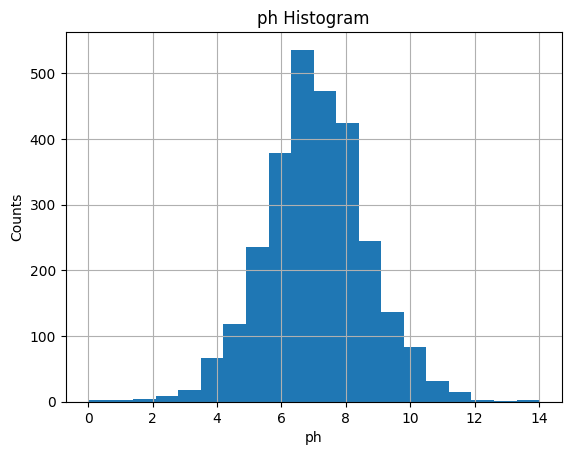

In [5]:
df['ph'].hist(bins=20)
plt.title('ph Histogram')
plt.xlabel('ph')
plt.ylabel('Counts')
plt.show()

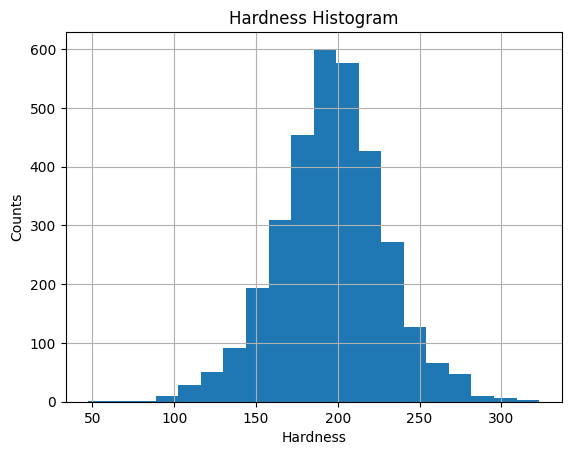

In [6]:
df['Hardness'].hist(bins=20)
plt.title('Hardness Histogram')
plt.xlabel('Hardness')
plt.ylabel('Counts')
plt.show()

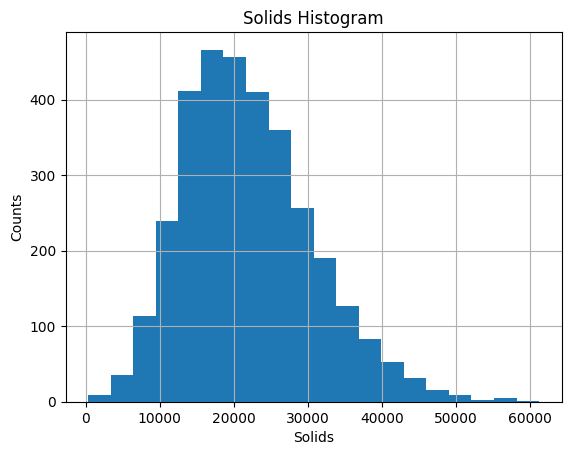

In [7]:
df['Solids'].hist(bins=20)
plt.title('Solids Histogram')
plt.xlabel('Solids')
plt.ylabel('Counts')
plt.show()

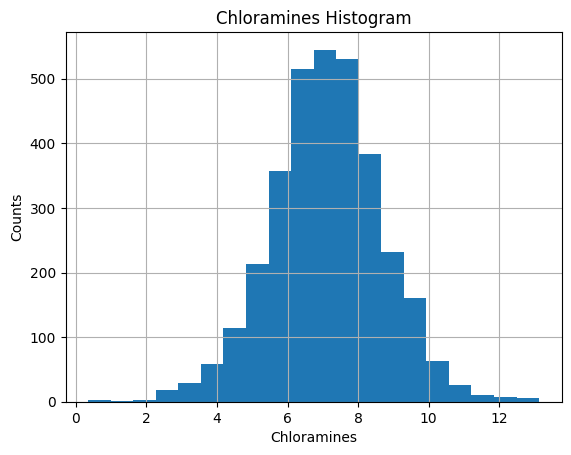

In [8]:
df['Chloramines'].hist(bins=20)
plt.title('Chloramines Histogram')
plt.xlabel('Chloramines')
plt.ylabel('Counts')
plt.show()

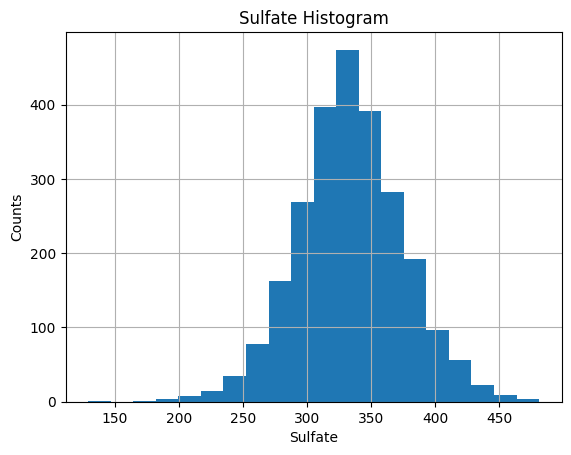

In [9]:
df['Sulfate'].hist(bins=20)
plt.title('Sulfate Histogram')
plt.xlabel('Sulfate')
plt.ylabel('Counts')
plt.show()

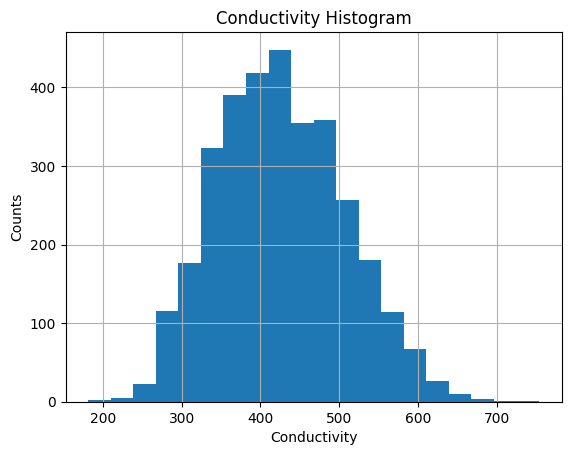

In [10]:
df['Conductivity'].hist(bins=20)
plt.title('Conductivity Histogram')
plt.xlabel('Conductivity')
plt.ylabel('Counts')
plt.show()

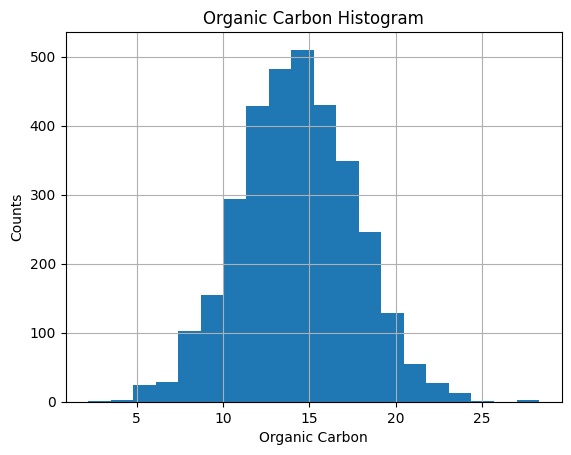

In [11]:
df['Organic_carbon'].hist(bins=20)
plt.title('Organic Carbon Histogram')
plt.xlabel('Organic Carbon')
plt.ylabel('Counts')
plt.show()

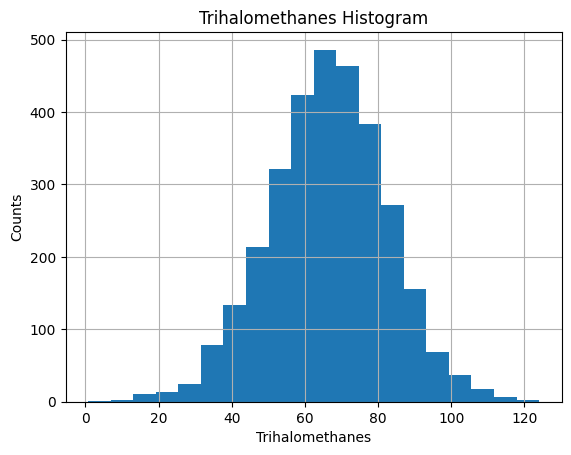

In [12]:
df['Trihalomethanes'].hist(bins=20)
plt.title('Trihalomethanes Histogram')
plt.xlabel('Trihalomethanes')
plt.ylabel('Counts')
plt.show()

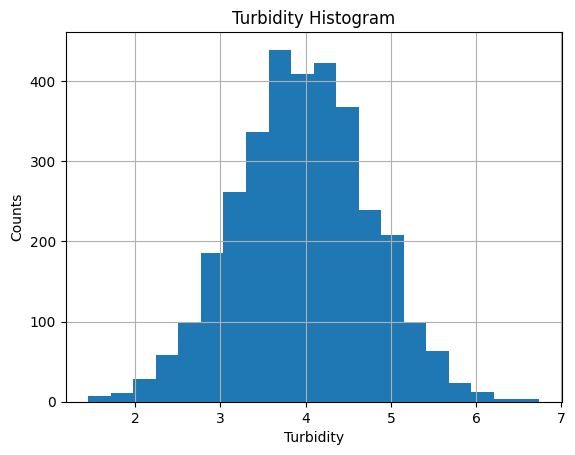

In [13]:
df['Turbidity'].hist(bins=20)
plt.title('Turbidity Histogram')
plt.xlabel('Turbidity')
plt.ylabel('Counts')
plt.show()

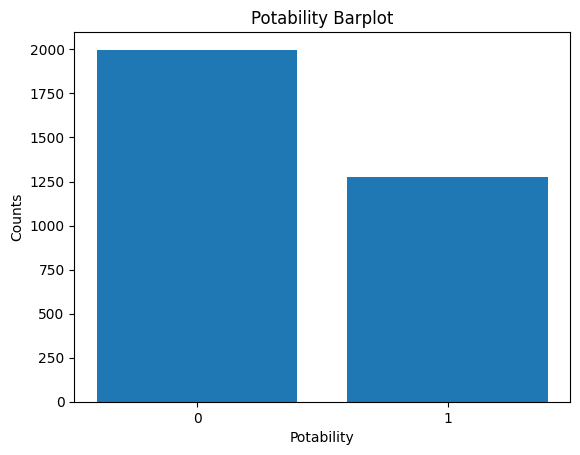

In [14]:
potability_counts=df['Potability'].value_counts()
plt.bar(potability_counts.index,potability_counts.values)
plt.title('Potability Barplot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.xticks(potability_counts.index)
plt.show()

In [15]:
for col in df.columns:
  print(f'number of missing values for {col} is: {df[col].isnull().sum()}')

number of missing values for ph is: 491
number of missing values for Hardness is: 0
number of missing values for Solids is: 0
number of missing values for Chloramines is: 0
number of missing values for Sulfate is: 781
number of missing values for Conductivity is: 0
number of missing values for Organic_carbon is: 0
number of missing values for Trihalomethanes is: 162
number of missing values for Turbidity is: 0
number of missing values for Potability is: 0


In [16]:
potper=potability_counts/3276*100
print(f'Not potable:{potper[0]:.2f}%')
print(f'Potable:{potper[1]:.2f}%')


Not potable:60.99%
Potable:39.01%


Θεωρώ πως η ποιότητα των δεδομένων δεν είναι αρκετά ικανοποιητική. Αρχικά έχουμε μεγάλο αριθμό από missing values σε χαρακτηριστικά όπως το ph (491), το sulfate (781) και το trihalomethanes (162). Αυτά τα χαρακτηριστικά είναι αρκετά σημαντικά για να χαρακτηριστεί το νερό πόσιμο ή μη πόσιμο, και άρα ο μεγάλος αριθμός από missing values μπορεί να επηρεάσει τη πρόβλεψη. Επιπλέον, σύμφωνα με το αποτέλεσμα της df.describe, έχουμε outlier τιμές για το ph, καθώς βλέπουμε ότι υπάρχει παράδειγμα όπου το ph έχει τιμή 0, το οποίο είναι μη ρεαλιστικό για νερό.

# Ερώτημα 2

In [17]:
df_ph65=df[df['ph']<6.5]
potcounts65=df_ph65['Potability'].value_counts()
potper65=potcounts65/len(df_ph65)*100
print(f'Not potable:{potper65[0]:.2f}%')
print(f'Potable:{potper65[1]:.2f}%')


Not potable:63.22%
Potable:36.78%


In [18]:
df_ph6585=df[(df['ph']>=6.5) & (df['ph']<=8.5)]
potcounts6585=df_ph6585['Potability'].value_counts()
potper6585=potcounts6585/len(df_ph6585)*100
print(f'Not potable:{potper6585[0]:.2f}%')
print(f'Potable:{potper6585[1]:.2f}%')


Not potable:56.10%
Potable:43.90%


In [19]:
df_ph85=df[df['ph']>8.5]
potcounts85=df_ph85['Potability'].value_counts()
potper85=potcounts85/len(df_ph85)*100
print(f'Not potable:{potper85[0]:.2f}%')
print(f'Potable:{potper85[1]:.2f}%')

Not potable:66.87%
Potable:33.13%


Παρατηρούμε ότι πράγματι στη περίπτωση όπου το ph είναι μεταξύ 6.5 και 8.5, το ποσοστό πόσιμου νερού είναι σχετικά μεγαλύτερο (43.9%) σε σχέση με τις άλλες δύο περιπτώσεις (36.78% και 33.13% αντίστοιχα).

# Ερώτημα 3

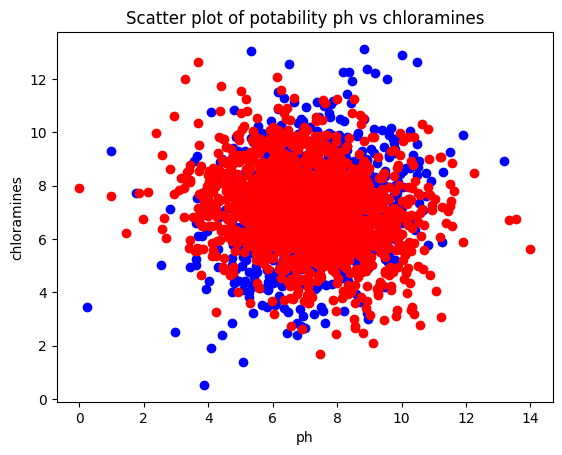

In [20]:
potable=df[df['Potability']==1]
notpotable=df[df['Potability']==0]
plt.scatter(potable['ph'],potable['Chloramines'],color='blue',label='Potable')
plt.scatter(notpotable['ph'],notpotable['Chloramines'],color='red',label='Not potable')
plt.title('Scatter plot of potability ph vs chloramines')
plt.xlabel('ph')
plt.ylabel('chloramines')
plt.legend
plt.show()

Παρατηρούμε ότι δεν υπάρχει καθόλου καλή διαχωρισιμότητα μεταξύ των παραδειγμάτων πόσιμου νερού και των παραδειγμάτων μή πόσιμου. Τα παραδείγματα και των δύο κλάσεων είναι το ένα πάνω στο άλλο (αρκετά μπερδεμένα). Αυτό σημαίνει ότι αν έχουμε στη διάθεση μας μόνο τα χαρακτηριστικά ph και chloramines, τότε δε μπορούμε να έχουμε αξιόπιστη πρόβλεψη για το αν το νερό είναι πόσιμο ή μή πόσιμο.

# Ερώτημα 4

Τα missing values συμπληρώθηκαν με χρήση της μέσης τιμής.

In [21]:
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

# Ερώτημα 5

In [22]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']
x = input_df.to_numpy()
y = targets_df.to_numpy()
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

# Ερώτημα 6

In [23]:
model=DecisionTreeClassifier(random_state=seed)
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
accuracy_percentage = round(accuracy*100, 2)
print(f'Accuracy in train set: {accuracy_percentage}%')
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)
print(f'Accuracy in test set: {accuracy_percentage}%')


Accuracy in train set: 100.0%
Accuracy in test set: 57.48%


# Ερώτημα 7

In [24]:
result=[]
criterions=['gini','entropy']
depths=[None,3,5]
splits=[2,5]
leaves=[1,2]
features=[None,'sqrt']
prunings=[0,0.01]

for cri in criterions:
  for d in depths:
    for sp in splits:
      for l in leaves:
        for f in features:
          for pr in prunings:
            model=DecisionTreeClassifier(criterion=cri,max_depth=d,min_samples_split=sp,min_samples_leaf=l,max_features=f,ccp_alpha=pr,random_state=seed)
            model.fit(x_train,y_train)
            y_pred=model.predict(x_train)
            accuracy_train=accuracy_score(y_train,y_pred)
            accuracy_percentage_train = round(accuracy_train*100, 2)
            y_pred=model.predict(x_test)
            accuracy_test=accuracy_score(y_test,y_pred)
            accuracy_percentage_test = round(accuracy_test*100, 2)
            result.append([cri,d,sp,l,f,pr,accuracy_percentage_train,accuracy_percentage_test])
cols=['criterion','max_depth','min_split','min_leaf','max_features','ccp_alpha','acc_train_set','acc_test_set']
df_res=pd.DataFrame(result,columns=cols)
print(df_res)


   criterion  max_depth  min_split  min_leaf max_features  ccp_alpha  \
0       gini        NaN          2         1         None       0.00   
1       gini        NaN          2         1         None       0.01   
2       gini        NaN          2         1         sqrt       0.00   
3       gini        NaN          2         1         sqrt       0.01   
4       gini        NaN          2         2         None       0.00   
..       ...        ...        ...       ...          ...        ...   
91   entropy        5.0          5         1         sqrt       0.01   
92   entropy        5.0          5         2         None       0.00   
93   entropy        5.0          5         2         None       0.01   
94   entropy        5.0          5         2         sqrt       0.00   
95   entropy        5.0          5         2         sqrt       0.01   

    acc_train_set  acc_test_set  
0          100.00         57.48  
1           60.53         62.05  
2          100.00         62.26  

# Ερώτημα 8

criterion        entropy
max_depth            3.0
min_split              2
min_leaf               1
max_features        None
ccp_alpha            0.0
acc_train_set      64.11
acc_test_set       63.99
Name: 64, dtype: object


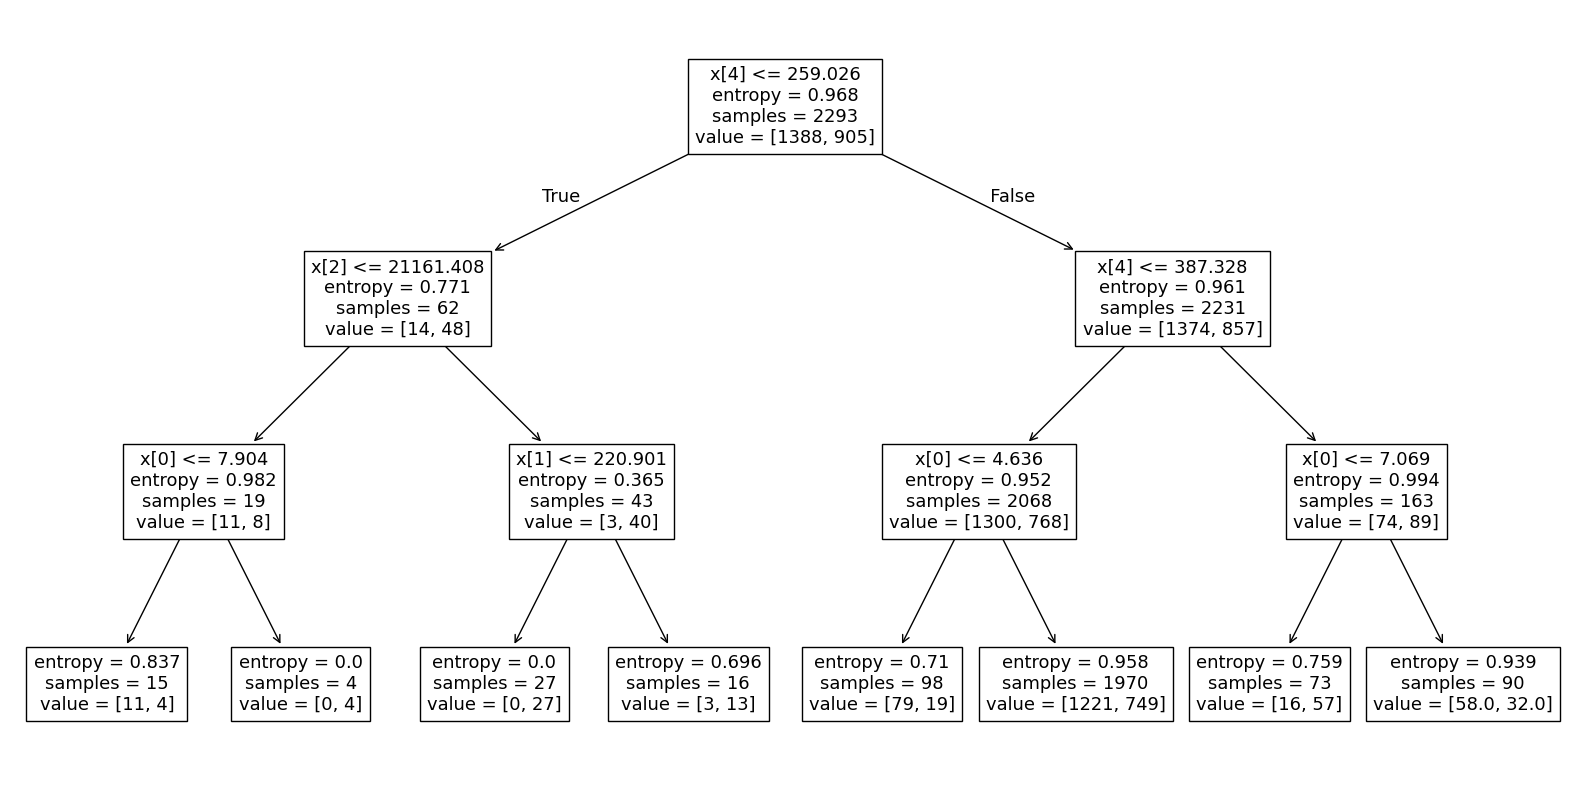

In [25]:
df_d3=df_res[df_res['max_depth']==3]
highest_acc_row_d3=df_d3.loc[df_d3['acc_test_set'].idxmax()]
print(highest_acc_row_d3)
model=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=2,min_samples_leaf=1,max_features=None,ccp_alpha=0,random_state=seed)
model.fit(x_train,y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(model)
plt.show()


Οι κανόνες που έβγαλε το δέντρο είναι αρκετοί και δε μπορούν να περιγραφούν αναλυτικά όλοι. Γενικά, το δέντρο χωρίζει τα δεδομένα με βάση συνθήκες για κάθε χαρακτηριστικό. Κάθε κόμβος περιέχει μια τέτοια συνθήκη και η διακλάδωση γίνεται ανάλογα με το αν ισχύει η συνθήκη ή όχι. Κάθε μονοπάτι από τη ρίζα ως κάποιο φύλλο, είναι ένας κανόνας. Το αποτέλεσμα στο φύλλο είναι η πρόβλεψη (πόσα παραδείγματα είναι πόσιμο και πόσα μή πόσιμο).

# Ερώτημα 9

criterion        entropy
max_depth            5.0
min_split              2
min_leaf               2
max_features        None
ccp_alpha            0.0
acc_train_set      67.12
acc_test_set       65.51
Name: 84, dtype: object


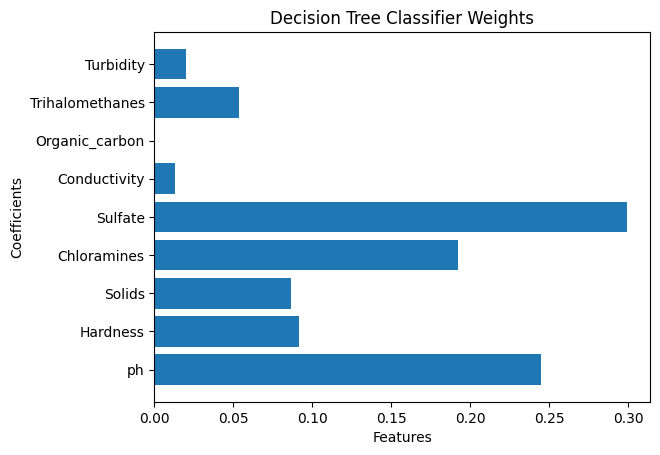

In [26]:
highest_acc_row=df_res.loc[df_res['acc_test_set'].idxmax()]
print(highest_acc_row)
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=2,min_samples_leaf=2,max_features=None,ccp_alpha=0,random_state=seed)
model.fit(x_train,y_train)
importance_weights = np.abs(model.feature_importances_)
plt.barh(input_df.columns, importance_weights)
plt.title('Decision Tree Classifier Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Τα χαρακτηριστικά που θα έπρεπε να εξαχθούν από το νερό είναι τα 5 με τη μεγαλύτερη σημαντικότητα, δηλαδή κατά σειρά τα sulfate, ph, chloramines, hardness, solids.

# Ερώτημα 10

Ίδιο με ερώτημα 9 (πιθανό λάθος εκφώνησης).

# Ερώτημα 11

Ένα τυχαίο δάσος πετυχαίνει μεγαλύτερη ακρίβεια καθώς συνδυάζει πολλά decision trees (estimators). Κάθε ένα από αυτά τα δέντρα χρησιμοποιεί διαφορετικό υποσύνολο δεδομένων και διαφορετικό υποσύνολο χαρακτηριστικών. Η τελική πρόβλεψη, βασίζεται στον μέσο όρο ή την πλειοψηφία και με αποτέλεσμα οι προβλέψεις να είναι πιο αξιόπιστες.

# Ερώτημα 12

In [28]:
result=[]
criterions=['gini','entropy']
depths=[None,3,5]
splits=[2,5]
leaves=[1,2]
features=[None,'sqrt']
prunings=[0,0.01]
estimators=[50,100,200]

for cri in criterions:
  for d in depths:
    for sp in splits:
      for l in leaves:
        for f in features:
          for pr in prunings:
            for est in estimators:
              model=RandomForestClassifier(n_estimators=est,criterion=cri,max_depth=d,min_samples_split=sp,min_samples_leaf=l,max_features=f,ccp_alpha=pr,random_state=seed)
              model.fit(x_train,y_train)
              y_pred=model.predict(x_train)
              accuracy_train=accuracy_score(y_train,y_pred)
              accuracy_percentage_train = round(accuracy_train*100, 2)
              y_pred=model.predict(x_test)
              accuracy_test=accuracy_score(y_test,y_pred)
              accuracy_percentage_test = round(accuracy_test*100, 2)
              result.append([est,cri,d,sp,l,f,pr,accuracy_percentage_train,accuracy_percentage_test])
cols=['n_estimatos','criterion','max_depth','min_split','min_leaf','max_features','ccp_alpha','acc_train_set','acc_test_set']
df_resrf=pd.DataFrame(result,columns=cols)
print(df_resrf)

     n_estimatos criterion  max_depth  min_split  min_leaf max_features  \
0             50      gini        NaN          2         1         None   
1            100      gini        NaN          2         1         None   
2            200      gini        NaN          2         1         None   
3             50      gini        NaN          2         1         None   
4            100      gini        NaN          2         1         None   
..           ...       ...        ...        ...       ...          ...   
283          100   entropy        5.0          5         2         sqrt   
284          200   entropy        5.0          5         2         sqrt   
285           50   entropy        5.0          5         2         sqrt   
286          100   entropy        5.0          5         2         sqrt   
287          200   entropy        5.0          5         2         sqrt   

     ccp_alpha  acc_train_set  acc_test_set  
0         0.00         100.00         67.24  
1      

# Ερώτημα 13

Θεωρώ πως είναι πολύ πιο σημαντικό για το μοντέλο να προβλέπει καλύτερα το μή πόσιμο νερό και να χάνει ακρίβεια από το πόσιμο, καθώς άμα το μοντέλο προβλέψει λάθος ένα μή πόσιμο νερό θα υπάρξουν προβλήματα υγείας για αρκετό κόσμο. Στη περίπτωση που το μοντέλο προβλέψει λάθος ένα πόσιμο νερό, δε θα υπάρξει κίνδυνος.

# Ερώτημα 14

Νομικά ασφαλέστερη επιλογή για την εταιρία είναι η χρήση του καλύτερου τυχαίου δάσους, καθώς, όπως αναφέρθηκε και στο Ερώτημα 11, ένα τυχαίο δάσος πετυχαίνει μεγαλύτερη ακρίβεια αφού συνδυάζει πολλά decision trees. Άρα οι προβλέψεις είναι πιο αξιόπιστες.